In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('detailed_ev_charging_stations.csv')

In [4]:
df.dtypes

,0
Station ID,object
Latitude,float64
Longitude,float64
Address,object
Charger Type,object
Cost (USD/kWh),float64
Availability,object
Distance to City (km),float64
Usage Stats (avg users/day),int64
Station Operator,object


In [45]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

,0
Station ID,0
Latitude,0
Longitude,0
Address,0
Charger Type,0
Cost (USD/kWh),0
Availability,0
Distance to City (km),0
Usage Stats (avg users/day),0
Station Operator,0


**Qual é a média de custo por kWh das estações de carregamento?**

In [22]:
df['Cost (USD/kWh)'].mean()

0.300196

**Quantas estações utilizam fontes de energia renovável?**

In [7]:
df['Renewable Energy Source'].value_counts()

,count
Renewable Energy Source,
Yes,2566
No,2434


Verificando a quantidade de estações que possuem fontes de energia renovável. **Conclusão:**
- 2566 estações possuem fontes de energia renovável
- 2434 que não possuem fontes de energia renovavel


**Qual é a média de avaliações (reviews) das estações?**

In [8]:
df.head()
df['Reviews (Rating)'].mean().round()

4.0

Em resposta, temos a conclusão que a média das avaliações das estações são de **4.0**

**Qual é o total de vagas de estacionamento disponíveis em todas as estações?**

In [9]:
df.head()
df['Parking Spots'].sum()

27598

O Total de vagas de estacionamento disponível para o carregamento dos carros elétircos é de **27598** lugares

**Quantas estações possuem carregamento rápido (por exemplo, acima de 50 kW)?**

In [10]:
df.head()
df[df['Charging Capacity (kW)'] > 50].shape[0]

2539

A quantidade de carrgeadores capacitados com o carregamento rápido (acima de 50 kW)é de **2539** carregadores

**Qual é a média da capacidade de carregamento (kW) por tipo de conector?**

In [11]:
df.head(2)
df.groupby('Connector Types')['Charging Capacity (kW)'].mean().round(2)

,Charging Capacity (kW)
Connector Types,
CCS,150.49
"CCS, CHAdeMO",141.85
"CCS, Tesla",133.00
"CCS, Type 2",143.80
CHAdeMO,141.71
"CHAdeMO, CCS",148.91
"CHAdeMO, Tesla",145.61
"CHAdeMO, Type 2",145.46
Tesla,143.57


In [12]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

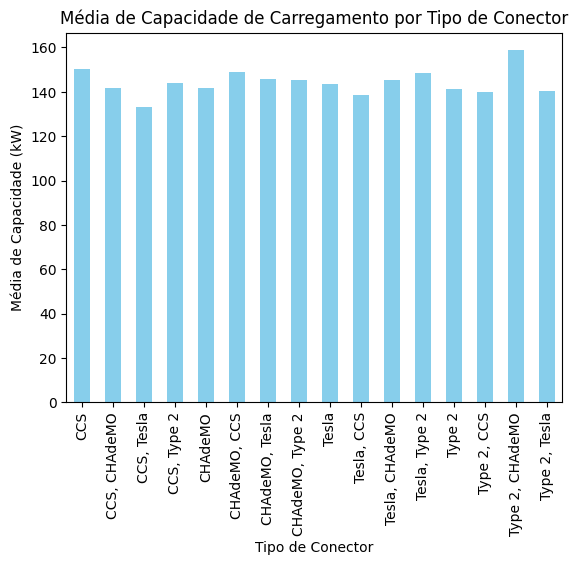

In [13]:
mean_capacity_by_connector = df.groupby('Connector Types')['Charging Capacity (kW)'].mean().round(2)
mean_capacity_by_connector.plot(kind='bar', color='skyblue')
plt.title('Média de Capacidade de Carregamento por Tipo de Conector')
plt.xlabel('Tipo de Conector')
plt.ylabel('Média de Capacidade (kW)')
plt.xticks(rotation=90)
plt.show

**Existe correlação entre a capacidade de carregamento (kW) e o número médio de usuários por dia?**

In [14]:
df.head(2)
df[['Charging Capacity (kW)', 'Usage Stats (avg users/day)']].corr()

,Charging Capacity (kW),Usage Stats (avg users/day)
Charging Capacity (kW),1.000000,-0.017878
Usage Stats (avg users/day),-0.017878,1.000000


A correlação entre a capacidade de carregamento e o número médio de usuários por dia é extremamente baixa, ou seja, praticamente não a correlação

**Qual o custo médio por kWh para estações que utilizam energia renovável vs. não renovável?**

In [24]:
df.head(2)
df.groupby('Renewable Energy Source')['Cost (USD/kWh)'].mean()

,Cost (USD/kWh)
Renewable Energy Source,
No,0.299006
Yes,0.301325


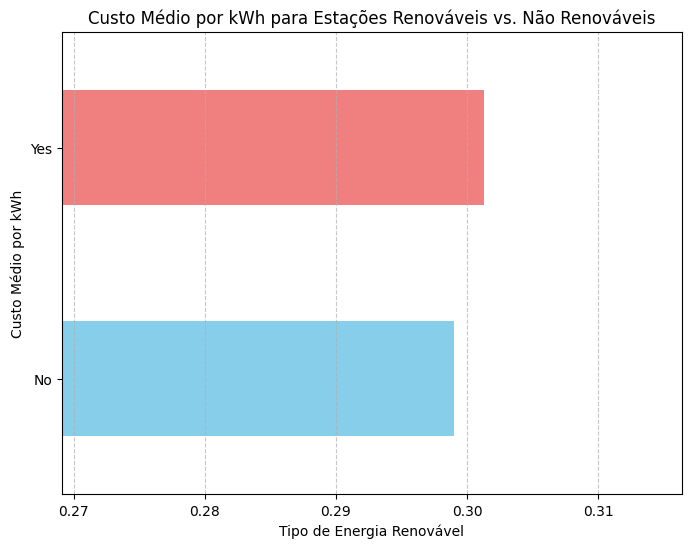

In [69]:
plt.figure(figsize=(8, 6))
mean_cost_energy_sourse =df.groupby('Renewable Energy Source')['Cost (USD/kWh)'].mean()
mean_cost_energy_sourse.plot(kind='barh', color=['skyblue', 'lightcoral'])
plt.title('Custo Médio por kWh para Estações Renováveis vs. Não Renováveis')
plt.xlabel('Tipo de Energia Renovável')
plt.ylabel('Custo Médio por kWh')
plt.xlim(left=mean_cost_energy_sourse.min() * 0.9)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

A diferença é muito pequena quando coolocado no gráfico, porém concluímos que o custo médio para as estações que utilizam a energia do tipo renovável é maior

**Quais são os 3 operadores de estação com maior número de pontos de carregamento?**

In [50]:
df.groupby('Station Operator')['Parking Spots'].sum().sort_values(ascending=False).head(3)

,Parking Spots
Station Operator,
Tesla,5680
EVgo,5579
ChargePoint,5540


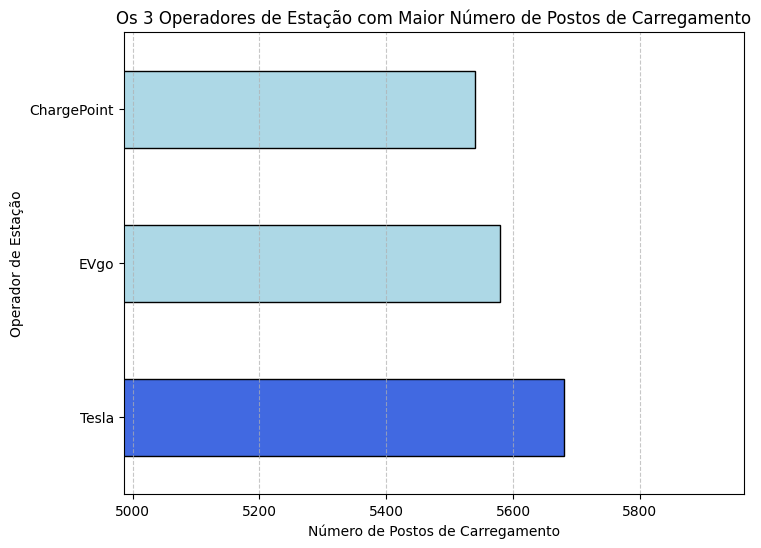

In [61]:
most_station_infrastructure = df.groupby('Station Operator')['Parking Spots'].sum().sort_values(ascending=False).head(3)

colors = ['lightblue' if x < most_station_infrastructure.max() else 'royalblue' for x in most_station_infrastructure]

plt.figure(figsize=(8, 6))
bars = most_station_infrastructure.plot(kind='barh', color=colors, edgecolor='black')

plt.title('Os 3 Operadores de Estação com Maior Número de Postos de Carregamento')
plt.xlabel('Número de Postos de Carregamento')
plt.ylabel('Operador de Estação')
plt.xlim(left=most_station_infrastructure.min() * 0.9)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
